<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/REGRESION/LABS/Introducci%C3%B3n_Problem_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

url = "https://raw.githubusercontent.com/it-ces/PUBLIC-AI/main/REGRESION/cobb-douglas-firm.csv"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(url)

In [80]:
df.columns

Index(['Unnamed: 0', 'K', 'L', 'y'], dtype='object')

In [81]:
df.drop(columns=['Unnamed: 0'], inplace=True)

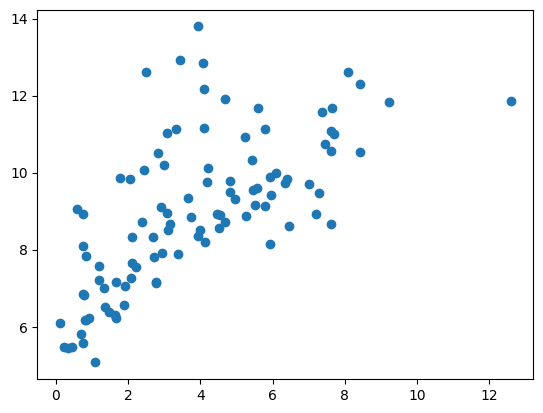

In [82]:
plt.scatter(df['L'], df['y'])

In [83]:
df.corr()

,K,L,y
K,1.000000,0.130581,0.454278
L,0.130581,1.000000,0.674986
y,0.454278,0.674986,1.000000


# the best line?



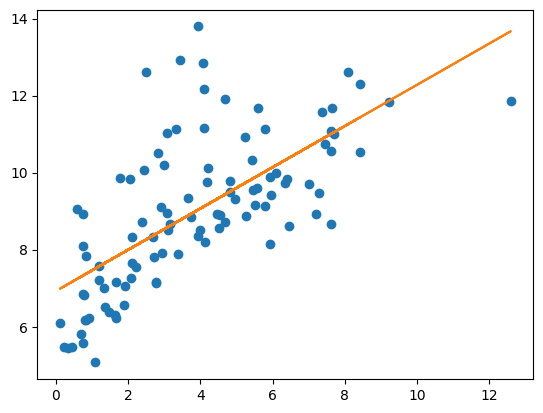

In [84]:
import matplotlib.pyplot as plt
x = df['L']
y = df['y']
#create basic scatterplot
plt.plot(x, y, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot
plt.plot(x, m*x+b)

In [85]:
# A worker production example to initialize..

In [86]:
df

,K,L,y
0,10.448902,3.980349,8.498402
1,10.802293,2.125921,8.317644
2,10.630025,0.852183,6.175296
3,11.280932,4.112527,12.158838
4,10.376671,3.070118,8.945734
...,...,...,...
95,9.610686,5.571744,9.592110
96,10.707748,3.752217,8.846282
97,9.022959,1.920561,7.061450
98,10.476081,3.007337,10.188356


In [87]:
df_l = df.copy()

In [88]:
df_l  = df_l.apply(lambda row: row/df_l['L'])
df_l  = df_l.apply(lambda x: np.log(x))

In [89]:
df_l

,K,L,y
0,0.965127,0.0,0.758509
1,1.625553,0.0,1.364174
2,2.523636,0.0,1.980510
3,1.009076,0.0,1.084019
4,1.217844,0.0,1.069461
...,...,...,...
95,0.545168,0.0,0.543233
96,1.048621,0.0,0.857650
97,1.547155,0.0,1.302033
98,1.248040,0.0,1.220191


In [90]:
df_l.drop(df_l[df_l['K']>22].index, inplace=True)

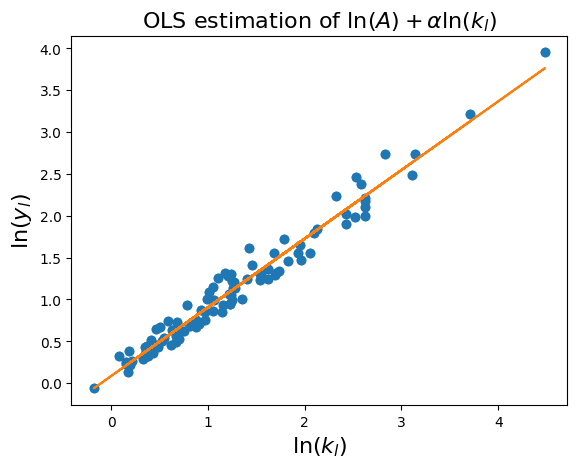

In [91]:
import matplotlib.pyplot as plt
plt.scatter(df_l['K'], df_l['y'])
x = df_l['K']
y = df_l['y']
#create basic scatterplot
plt.plot(x, y, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot
plt.plot(x, m*x+b)

plt.title(r'OLS estimation of $\ln(A) + \alpha \ln(k_{l})$', fontsize=16)
plt.xlabel(r'$\ln(k_{l})$', fontsize=16)
plt.ylabel(r'$\ln(y_{l})$', fontsize=16)
plt.savefig("production.eps")

In [92]:
df

,K,L,y
0,10.448902,3.980349,8.498402
1,10.802293,2.125921,8.317644
2,10.630025,0.852183,6.175296
3,11.280932,4.112527,12.158838
4,10.376671,3.070118,8.945734
...,...,...,...
95,9.610686,5.571744,9.592110
96,10.707748,3.752217,8.846282
97,9.022959,1.920561,7.061450
98,10.476081,3.007337,10.188356


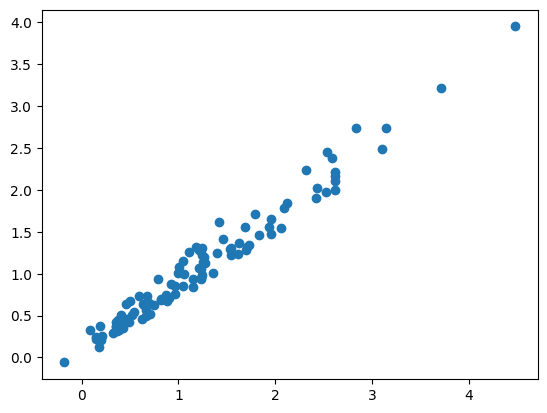

In [93]:
plt.scatter(df_l['K'], df_l['y'])

In [94]:
df

,K,L,y
0,10.448902,3.980349,8.498402
1,10.802293,2.125921,8.317644
2,10.630025,0.852183,6.175296
3,11.280932,4.112527,12.158838
4,10.376671,3.070118,8.945734
...,...,...,...
95,9.610686,5.571744,9.592110
96,10.707748,3.752217,8.846282
97,9.022959,1.920561,7.061450
98,10.476081,3.007337,10.188356


In [95]:
df_l

,K,L,y
0,0.965127,0.0,0.758509
1,1.625553,0.0,1.364174
2,2.523636,0.0,1.980510
3,1.009076,0.0,1.084019
4,1.217844,0.0,1.069461
...,...,...,...
95,0.545168,0.0,0.543233
96,1.048621,0.0,0.857650
97,1.547155,0.0,1.302033
98,1.248040,0.0,1.220191


In [96]:
import statsmodels.formula.api as smf

In [97]:
df.columns

Index(['K', 'L', 'y'], dtype='object')

In [98]:
formula = 'y ~  K'
print(smf.ols(formula=formula, data = df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     25.48
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.06e-06
Time:                        18:26:58   Log-Likelihood:                -198.32
No. Observations:                 100   AIC:                             400.6
Df Residuals:                      98   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1736      1.825     -0.095      0.9

In [99]:
print(smf.ols(formula=formula, data = df_l).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2746.
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.73e-73
Time:                        18:26:58   Log-Likelihood:                 58.853
No. Observations:                 100   AIC:                            -113.7
Df Residuals:                      98   BIC:                            -108.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0848      0.024      3.565      0.0